In [1]:
!apt install -y libopenexr-dev
!pip install OpenEXR==1.3.2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libopenexr-dev is already the newest version (2.5.7-1).
libopenexr-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
  Preparing metadata (setup.py) ... done
  Created wheel for OpenEXR: filename=OpenEXR-1.3.2-cp311-cp311-linux_x86_64.whl size=246756 sha256=b0bcb3a368221653eef53a249bed0552b6c08019c73c288d3d61a8ad8c92c57e
  Stored in directory: /root/.cache/pip/wheels/b9/df/d8/6b96657f8a311ff25f404da28ca0988939790fac369c85a066
Successfully built OpenEXR


In [2]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving frame_0000.exr to frame_0000.exr


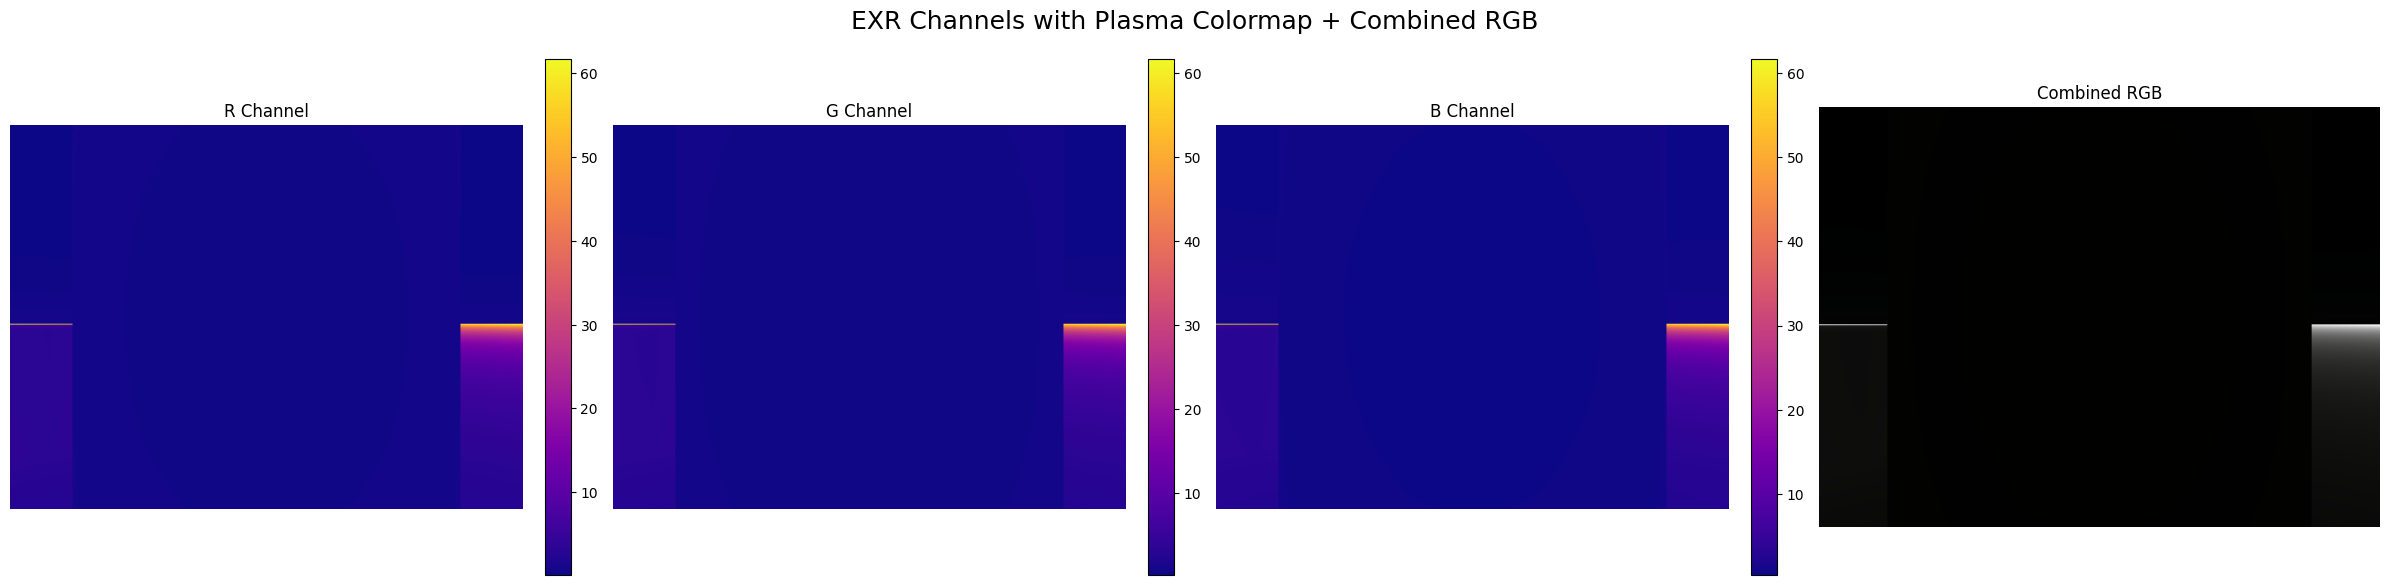

In [9]:
import OpenEXR
import Imath
import numpy as np
import matplotlib.pyplot as plt

# Load the EXR file
filename = "frame_0000.exr"
exr_file = OpenEXR.InputFile(filename)

# Get dimensions
dw = exr_file.header()['dataWindow']
width = dw.max.x - dw.min.x + 1
height = dw.max.y - dw.min.y + 1

# Define pixel type and channels
pt = Imath.PixelType(Imath.PixelType.FLOAT)
channels = ['R', 'G', 'B']

# Load channels
rgb = {
    c: np.frombuffer(exr_file.channel(c, pt), dtype=np.float32).reshape(height, width)
    for c in channels
}

# Normalize for consistent display (0 to 1)
rgb_norm = {c: (rgb[c] - np.min(rgb[c])) / (np.max(rgb[c]) - np.min(rgb[c]) + 1e-8) for c in channels}
rgb_image = np.stack([rgb_norm['R'], rgb_norm['G'], rgb_norm['B']], axis=-1)

# Plot with colorbars for R, G, B
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

for i, c in enumerate(channels):
    im = axs[i].imshow(rgb[c], cmap='plasma')
    axs[i].set_title(f'{c} Channel')
    axs[i].axis('off')
    plt.colorbar(im, ax=axs[i], fraction=0.046, pad=0.04)

axs[3].imshow(rgb_image)
axs[3].set_title('Combined RGB')
axs[3].axis('off')

plt.suptitle("EXR Channels with Plasma Colormap + Combined RGB", fontsize=18)
plt.tight_layout()
plt.show()


